In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

Basic data wrangling

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head() ##gives first 5 values

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.isnull().sum() # all null values


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

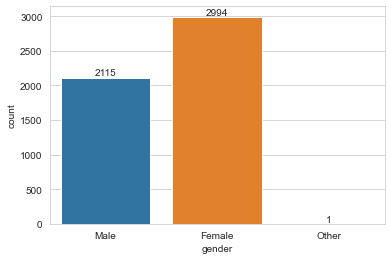

In [49]:
# plt.figure(figsize=(8,7))
# sns.countplot(x=df['gender'])
# plt.title('genderwise distribution',fontsize=15)
# plt.xlabel('gender')
# plt.ylabel('count')
# # = df.value_counts('gender')
# # ax = sns.barplot(x='gender', y=,
# #                  data=df,
# #                  errwidth=0)
# # ax.bar_label(ax.containers[0])

# plt.show()
ax = sns.countplot(x='gender', data=df)
ax.bar_label(ax.containers[0]);


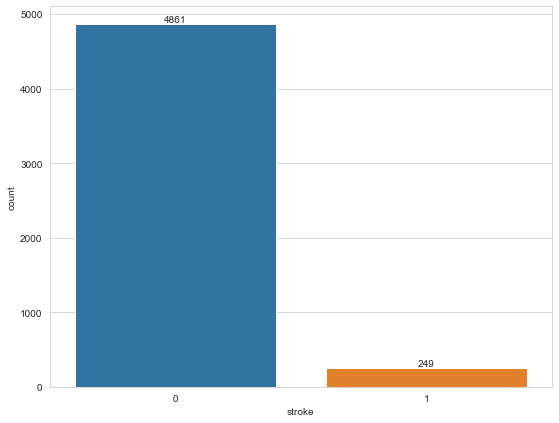

In [52]:
plt.figure(figsize = (9, 7))
ax = sns.countplot(x='stroke', data=df)
ax.bar_label(ax.containers[0]);

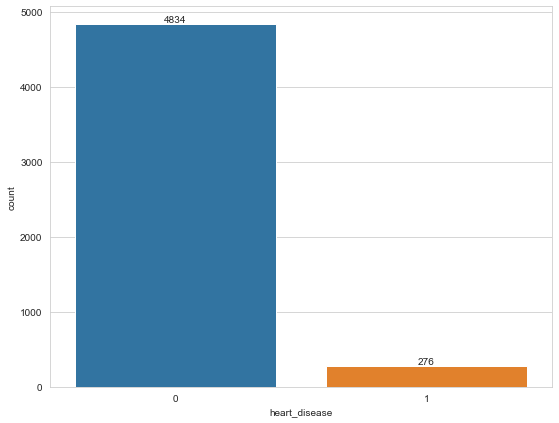

In [53]:
plt.figure(figsize = (9, 7))
ax = sns.countplot(x='heart_disease', data=df)
ax.bar_label(ax.containers[0]);

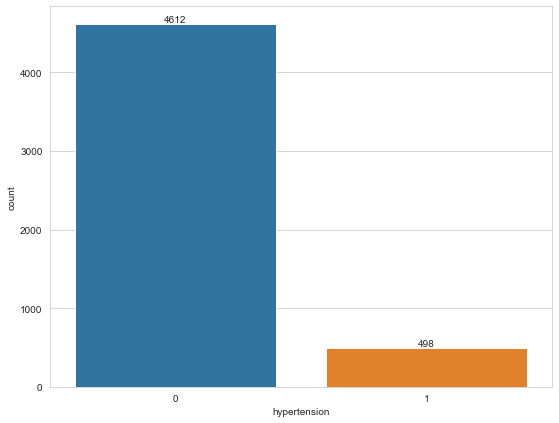

In [54]:
plt.figure(figsize = (9, 7))
ax = sns.countplot(x='hypertension', data=df)
ax.bar_label(ax.containers[0]);

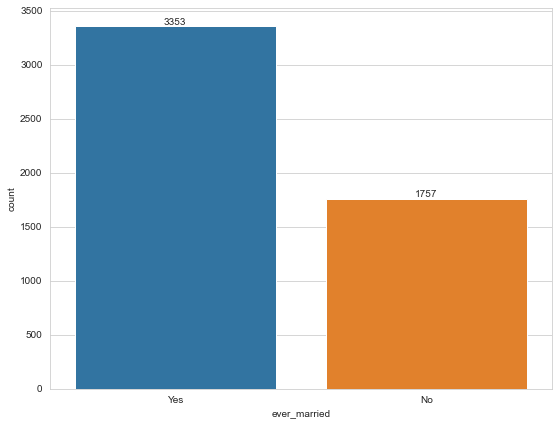

In [55]:
plt.figure(figsize = (9, 7))
ax = sns.countplot(x='ever_married', data=df)
ax.bar_label(ax.containers[0]);

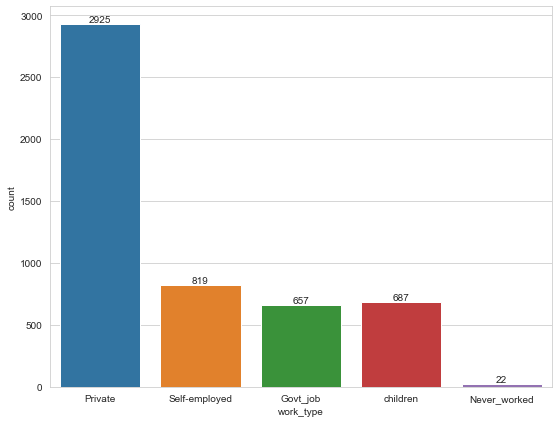

In [56]:
plt.figure(figsize = (9, 7))
ax = sns.countplot(x='work_type', data=df)
ax.bar_label(ax.containers[0]);

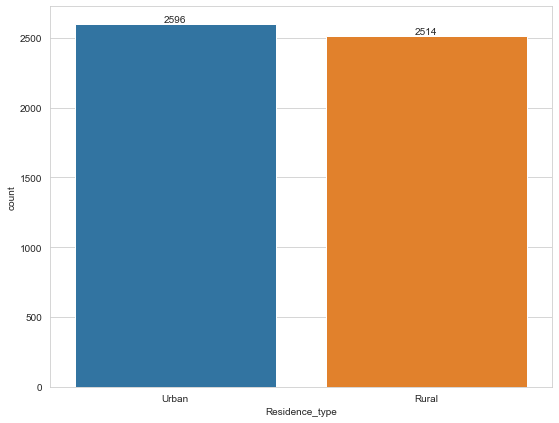

In [58]:
plt.figure(figsize = (9, 7))
ax = sns.countplot(x='Residence_type', data=df)
ax.bar_label(ax.containers[0]);

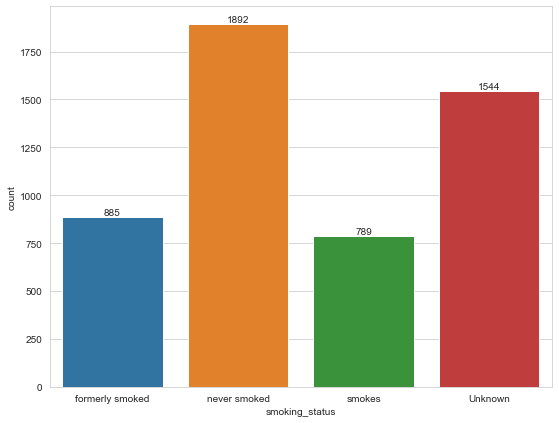

In [59]:
plt.figure(figsize = (9, 7))
ax = sns.countplot(x='smoking_status', data=df)
ax.bar_label(ax.containers[0]);

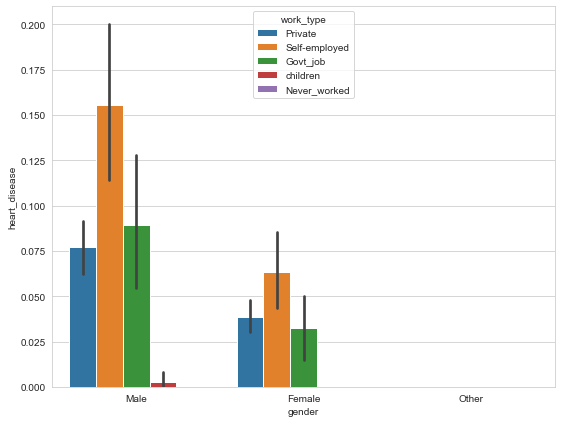

In [68]:
plt.figure(figsize = (9, 7))
ax = sns.barplot(x='gender', y='heart_disease',hue='work_type', data=df)
# ax.bar_label(ax.containers[0]);

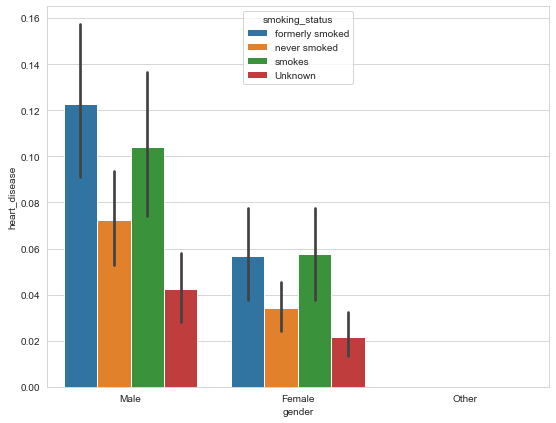

In [65]:
plt.figure(figsize = (9, 7))
ax = sns.barplot(x='gender', y='heart_disease',hue='smoking_status', data=df)
# ax.bar_label(ax.containers[0]);

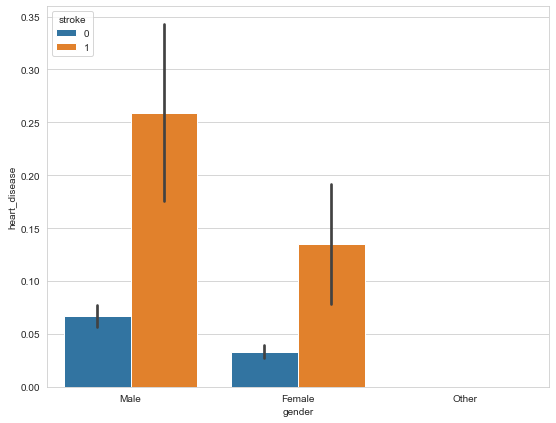

In [64]:
plt.figure(figsize = (9, 7))
ax = sns.barplot(x='gender', y='heart_disease',hue='stroke', data=df)
# ax.bar_label(ax.containers[0]);

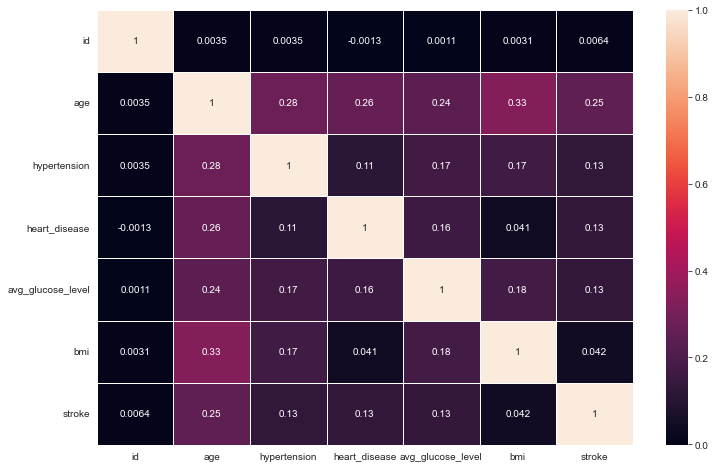

In [67]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), linecolor = 'white', linewidths = 1, annot = True)
plt.show()


In [141]:
df_main=pd.get_dummies(df,columns=['work_type'])

In [142]:
df_main=pd.get_dummies(df_main,columns=['smoking_status'])

In [143]:
df_main

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Rural,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Rural,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Urban,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Rural,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Urban,83.75,NaN,0,0,0,1,0,0,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Urban,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,19723,Female,35.0,0,0,Yes,Rural,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,37544,Male,51.0,0,0,Yes,Rural,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [144]:
df_main['ever_married']=df_main['ever_married'].map({'Yes':1,'No':0})
df_main['gender']=df_main['gender'].map({'Male':1,'Female':0,'Other':-1})

In [145]:
df_main

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,Urban,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,Rural,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,Rural,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,Urban,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,Rural,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Urban,83.75,NaN,0,0,0,1,0,0,0,0,1,0
5106,44873,0,81.0,0,0,1,Urban,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,19723,0,35.0,0,0,1,Rural,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,37544,1,51.0,0,0,1,Rural,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [146]:
df_main['Residence_type']=df_main['Residence_type'].map({'Urban':1,'Rural':0})
# df_main['Residence_type'].unique()

In [147]:
# df_main.drop(columns=['Residence_type_0_1'],inplace=True)

In [159]:
df_main['bmi'].fillna(df_main['bmi'].mean(),inplace=True)##mean of all other value

In [161]:
df_main

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0


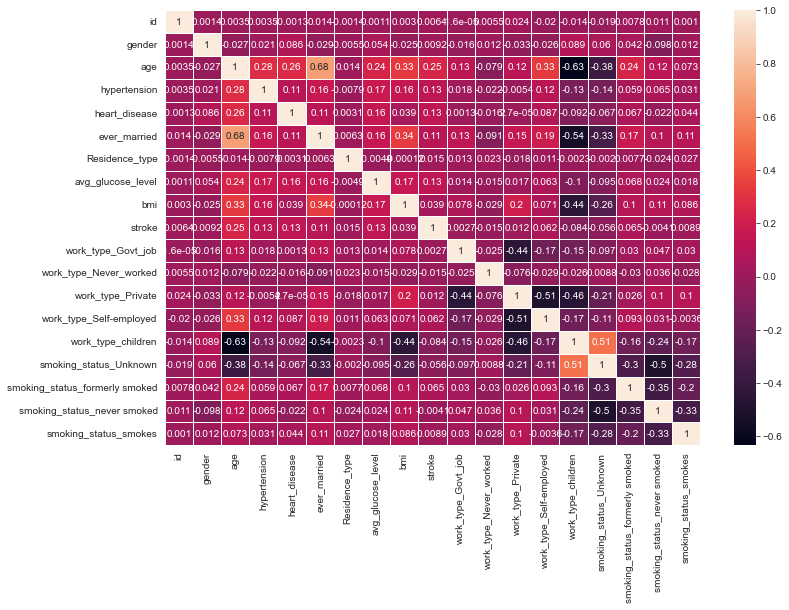

In [162]:
plt.figure(figsize = (12, 8))
sns.heatmap(df_main.corr(), linecolor = 'white', linewidths = 1, annot = True)
plt.show()

In [163]:
X=df_main.drop(columns=['stroke'])

In [164]:
y=df_main['stroke']


In [165]:
X

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.893237,0,0,1,0,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,1,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,1,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,0,1,0,0


In [166]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [167]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [168]:
X_train,X_test,y_train, y_test

(         id  gender    age  hypertension  heart_disease  ever_married  \
 3897  24257       1   4.00             0              0             0   
 576   56179       1  29.00             0              0             0   
 4013  36388       1  44.00             1              0             1   
 4536  59405       0  68.00             1              0             1   
 1180  46643       0  62.00             0              0             1   
 ...     ...     ...    ...           ...            ...           ...   
 4426  13846       1  43.00             0              0             1   
 466    1307       0  61.00             1              0             1   
 3092  31481       0   1.16             0              0             0   
 3772  61827       1  80.00             0              0             1   
 860   28933       0  46.00             0              0             1   
 
       Residence_type  avg_glucose_level   bmi  work_type_Govt_job  \
 3897               0              90.42

In [169]:
oversample=SMOTE()
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [174]:
rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

In [177]:
rf_cv=cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1')
svm_cv=cross_val_score(svm_pipeline,X_train,y_train,cv=10,scoring='f1')
logreg_cv=cross_val_score(logreg_pipeline,X_train,y_train,cv=10,scoring='f1')

In [179]:
rf_cv.mean()

0.9693743066393081

In [181]:
print('RF:',rf_cv.mean())
print('SVM:',svm_cv.mean())
print('LOGREG:',logreg_cv.mean())

RF: 0.9693743066393081
SVM: 0.9403472763502597
LOGREG: 0.9168124579004975


In [183]:
rf_pipeline.fit(X_train,y_train)
svm_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('LR', LogisticRegression(random_state=42))])

In [184]:
rf_pred=rf_pipeline.predict(X_test)
svm_pred=svm_pipeline.predict(X_test)
logreg_pred=logreg_pipeline.predict(X_test)

In [191]:
print(classification_report(y_test,rf_pred))
print(accuracy_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1444
           1       0.10      0.02      0.04        89

    accuracy                           0.93      1533
   macro avg       0.52      0.51      0.50      1533
weighted avg       0.89      0.93      0.91      1533

0.9315068493150684


In [190]:
print(classification_report(y_test,svm_pred))
print(accuracy_score(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1444
           1       0.21      0.09      0.13        89

    accuracy                           0.93      1533
   macro avg       0.58      0.53      0.54      1533
weighted avg       0.90      0.93      0.91      1533

0.9275929549902152


In [189]:
print(classification_report(y_test,logreg_pred))
print(accuracy_score(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1444
           1       0.28      0.21      0.24        89

    accuracy                           0.92      1533
   macro avg       0.61      0.59      0.60      1533
weighted avg       0.91      0.92      0.92      1533

0.9217221135029354


In [203]:
xgb_pipeline = Pipeline(steps = [('scale',StandardScaler()),('XGB',XGBClassifier())])
xgb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [204]:
xgb_pred=xgb_pipeline.predict(X_test)
print(classification_report(y_test,xgb_pred))
print(accuracy_score(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1444
           1       0.10      0.03      0.05        89

    accuracy                           0.93      1533
   macro avg       0.52      0.51      0.51      1533
weighted avg       0.89      0.93      0.91      1533

0.9262883235485975
